<a href="https://colab.research.google.com/github/Pilot-Khadka/Lung_Disease_Classification/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%ls

sample_data/


# Importing all libraries. Add libraries here

In [ ]:
import os
import shutil
import zipfile
import requests
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

%matplotlib inline
os.chdir("/content/drive/MyDrive")
!pip install black[jupyter] --quiet

<ipython-input-1-aa1268f6ed7b>:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
os.getcwd()
!black /content/drive/MyDrive/Colab\ Notebooks/sandbox.ipynb

All done! ✨ 🍰 ✨
1 file left unchanged.


This code checks if the file is in the path. If it isn't, the code downlads the file from the URL.

In [ ]:
url = "https://amitpant.com.np/dataset.zip"
file_name = "dataset.zip"

if not os.path.isfile(file_name):
    resp = requests.get(url)

    with open(file_name, "wb") as file:
        total_length = int(resp.headers.get("content-length"))
        progress_bar = tqdm(total=total_length, unit="iB", unit_scale=True)

        if total_length is None:
            for chunk in resp:
                file.write(chunk)

        else:
            length = 0
            total_length = int(total_length)

            for chunk in resp:
                progress_bar.update(len(chunk))
                file.write(chunk)

else:
    print("File exists.")

File exists.


The zip file contains 5 folders. If the folders are present in the working directory, the code returns exists. However, if any of the folders are missing, the code checks for the other folders and deletes them so that there are no duplicate folders. Then the zip file is extracted.

In [ ]:
# to check if all files exists, extract the zip file if the files doesn't exist

Normal = os.path.join("Normal")
TB_qatar = os.path.join("Tuberculosis-quatar")
pnemo_png = os.path.join("pnemo_png")
tb_shenzen = os.path.join("tb-shenzen")
tb_montgomery = os.path.join("tb-montgomery")
dataset = os.path.join("Dataset")

file_list = [Normal, TB_qatar, pnemo_png, tb_shenzen, tb_montgomery]
flag = 0

if not os.path.exists(dataset):
    for i in file_list:
        isExist = os.path.exists(i)
        print(i, "exists :", str(isExist))
        if not isExist:
            flag = 1

    if flag == 1:
        for i in file_list:
            try:
                shutil.rmtree(os.path.join(i))
            except OSError as e:
                print("Error: %s - %s." % (e.filename, e.strerror))

    print("Extracting Zip file:")
    with zipfile.ZipFile(file_name, "r") as zip_ref:
        for member in tqdm(zip_ref.infolist(), desc="Extracting "):
            zip_ref.extract(member)
else:
    print("Dataset folder exists")

Dataset folder exists


This code deletes all lung related folders.

import shutil

Normal = os.path.join('Normal')
TB_qatar = os.path.join('Tuberculosis-quatar')
pnemo_png = os.path.join('pnemo_png')
tb_shenzen = os.path.join('tb-shenzen')
tb_montgomery = os.path.join('tb-montgomery')

file_list = [Normal,TB_qatar,pnemo_png,tb_shenzen,tb_montgomery]
for i in file_list: 
    try:
      shutil.rmtree(os.path.join(i))
    except OSError as e:
      print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:
# Don't Run twice
# Change Dataset for 3 labels
!pwd 
!mkdir tb 
!mv pnemo_png pnemo #rename

/content/drive/MyDrive


In [ ]:
# Remove
# Move the images
!mv /content/drive/MyDrive/tb-montgomery/* tb 
!mv /content/drive/MyDrive/tb-shenzen/* tb
!mv /content/drive/MyDrive/Tuberculosis-quatar/* tb

In [ ]:
# Removing the directories
!rmdir /content/drive/MyDrive/tb-montgomery
!rmdir /content/drive/MyDrive/tb-shenzen
!rmdir /content/drive/MyDrive/Tuberculosis-quatar/

In [ ]:
# Moving to one folder
!mkdir Dataset
!mv /content/drive/MyDrive/pnemo /content/drive/MyDrive/Dataset/
!mv /content/drive/MyDrive/tb /content/drive/MyDrive/Dataset/
!mv /content/drive/MyDrive/Normal /content/drive/MyDrive/Dataset/

In [ ]:
Normal_dataset = len(os.listdir(os.path.join("Dataset/Normal")))
Pneumonia_dataset = len(os.listdir(os.path.join("Dataset/pnemo")))
TB_dataset = len(os.listdir(os.path.join("Dataset/tb")))

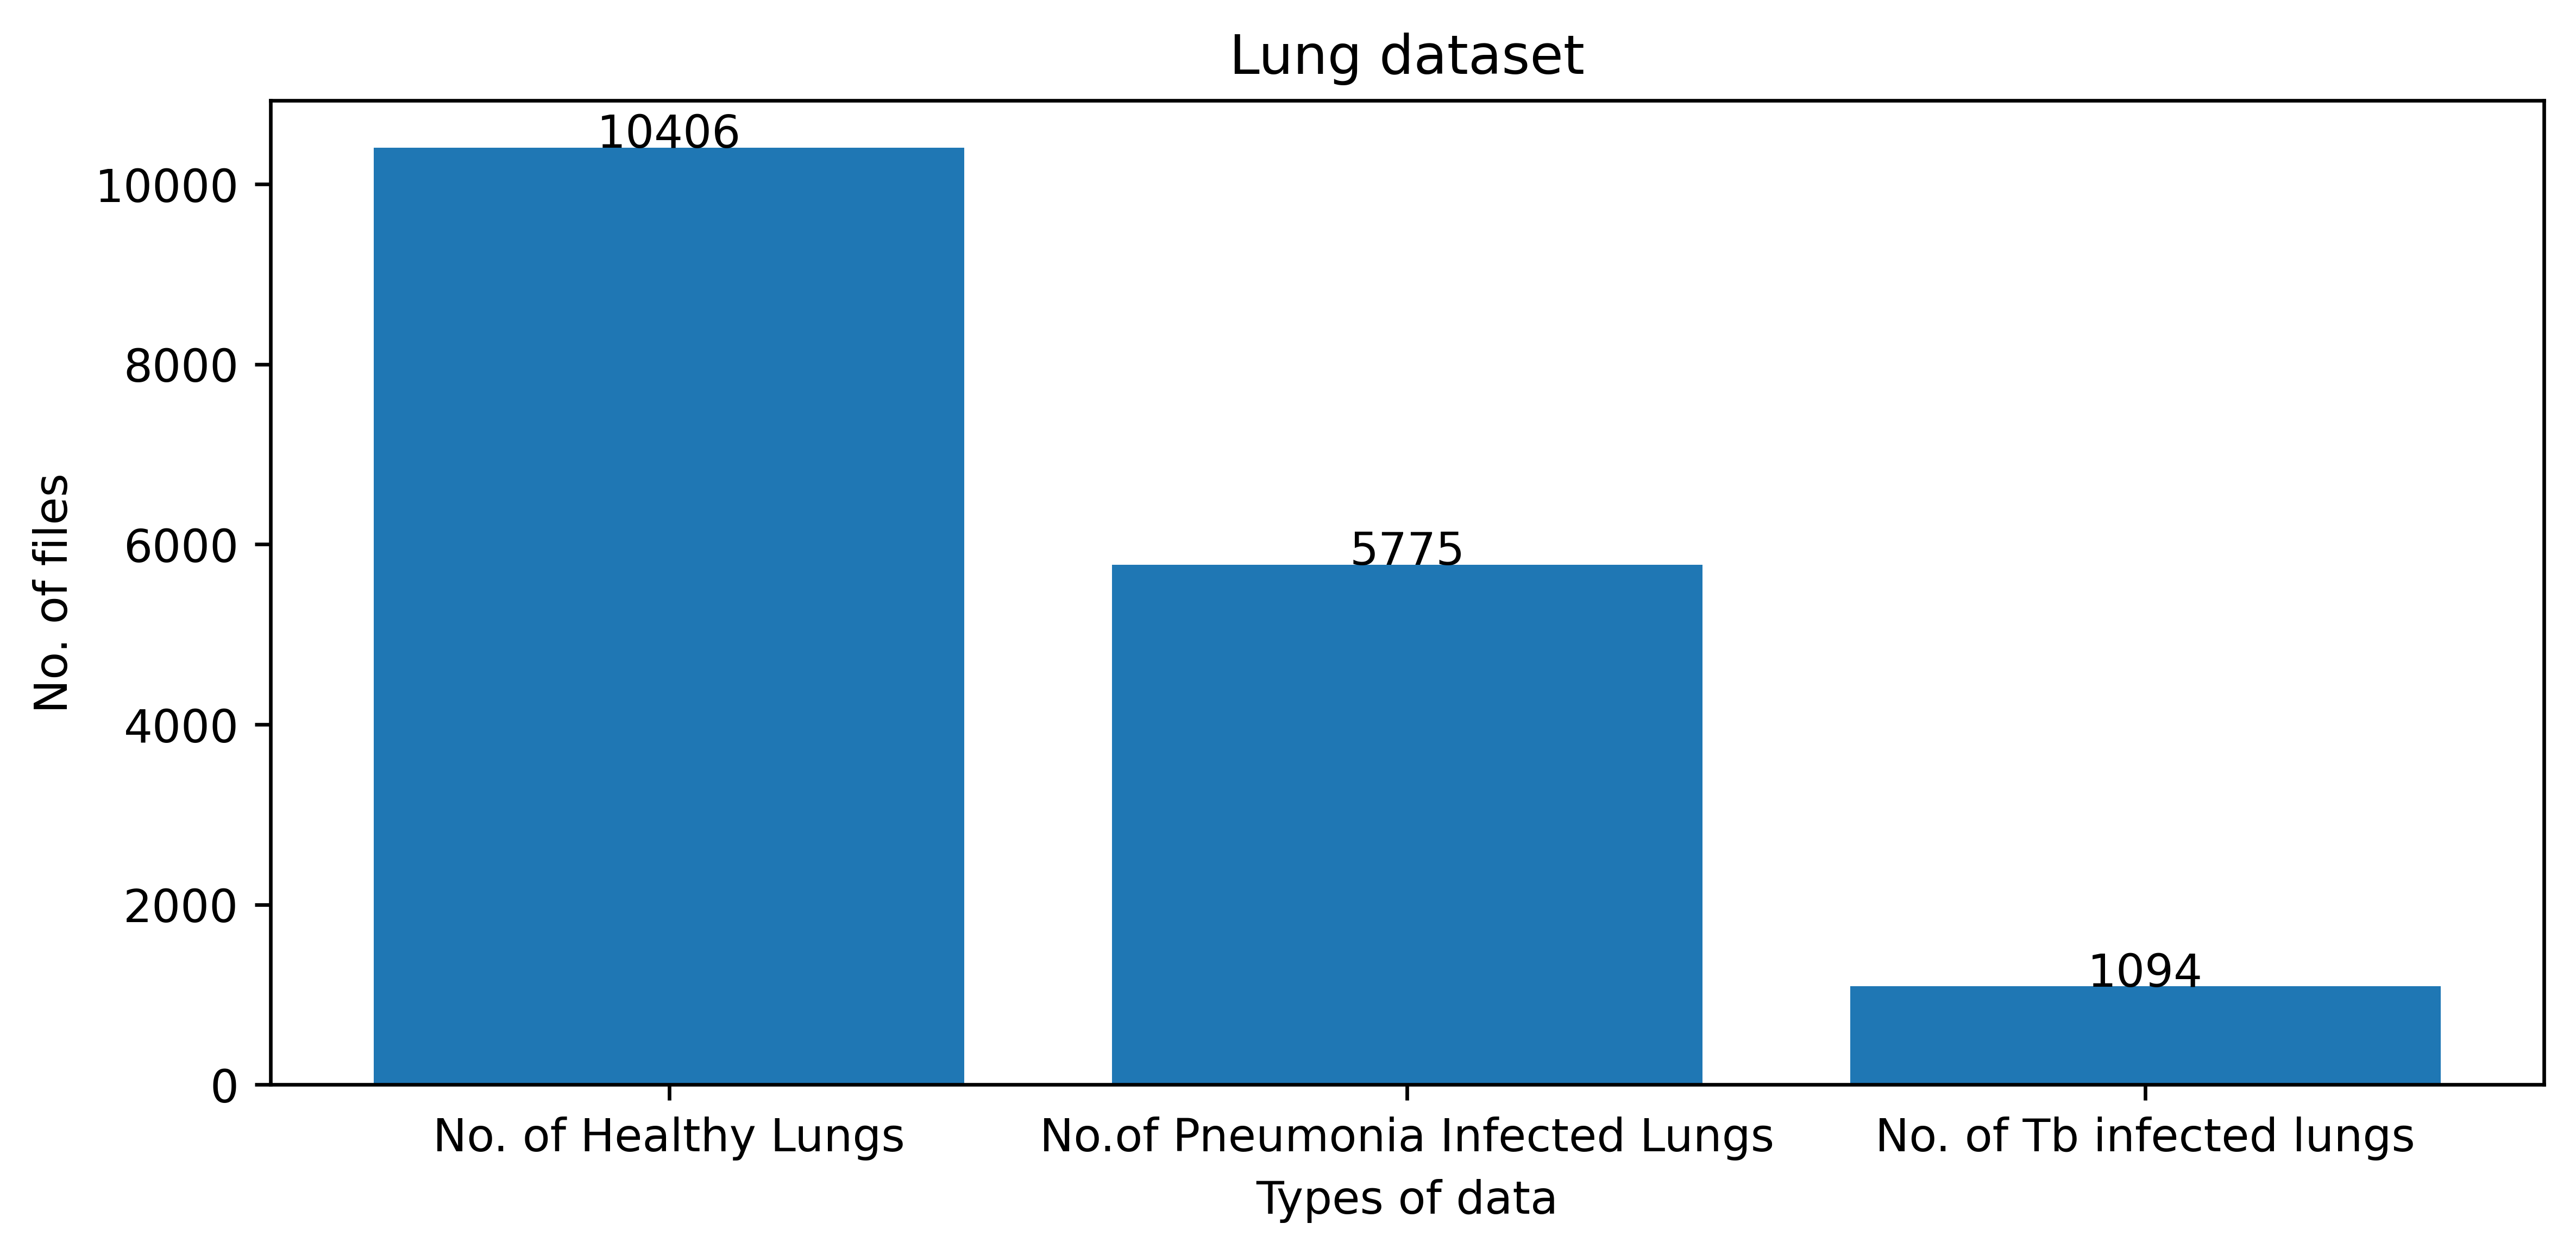

In [ ]:
import matplotlib.font_manager as fm

prop = fm.FontProperties(
    fname="/content/drive/MyDrive/Times New Roman/times new roman.ttf"
)
plt.rcParams["font.family"] = prop.get_name()

plt.figure(dpi=600, figsize=(9, 4))
plt.title("Lung dataset")
plt.xlabel("Types of data")
plt.ylabel("No. of files")

x = [
    "No. of Healthy Lungs",
    "No.of Pneumonia Infected Lungs",
    "No. of Tb infected lungs",
]
y = [Normal_dataset, Pneumonia_dataset, TB_dataset]
bar_colors = ["blue", "red", "orange"]
plt.bar(x, y)

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha="center")

plt.show()

In [ ]:
# create second folder called Dataset2 for undersampling using 1094 images for each class
import os
import random
import shutil
from concurrent.futures import ThreadPoolExecutor

# Set the source and destination folders
src_folder = "/content/drive/MyDrive/Dataset"
dst_folder = "/content/drive/MyDrive/Dataset2"
flag = True

# create the destination folder
if not os.path.exists(dst_folder):
    os.mkdir(dst_folder)
else:
    print(f"{dst_folder} already exist")
    flag = False

# create 3 subfolders in the destination folder if they do not exist
sub_folders = ["Normal", "pnemo", "tb"]
for sub_folder in sub_folders:
    dst_path = os.path.join(dst_folder, sub_folder)
    if not os.path.exists(dst_path):
        os.mkdir(dst_path)


def copy_file(src_file, dst_file):
    shutil.copy2(src_file, dst_file)


if flag:
    # copy 1094 random files from the source folders to the destination folders
    with ThreadPoolExecutor() as executor:
        for sub_folder in sub_folders:
            src_path = os.path.join(src_folder, sub_folder)
            dst_path = os.path.join(dst_folder, sub_folder)
            files = os.listdir(src_path)
            selected_files = random.sample(files, 1094)
            for file in selected_files:
                src_file = os.path.join(src_path, file)
                dst_file = os.path.join(dst_path)
                executor.submit(copy_file, src_file, dst_file)


# Print the number of files in each subfolder
for sub_folder in sub_folders:
    dst_path = os.path.join(dst_folder, sub_folder)
    files = os.listdir(dst_path)
    print(f"Number of files in {dst_path}: {len(files)}")

/content/drive/MyDrive/Dataset2 already exist
Number of files in /content/drive/MyDrive/Dataset2/Normal: 1094
Number of files in /content/drive/MyDrive/Dataset2/pnemo: 1094
Number of files in /content/drive/MyDrive/Dataset2/tb: 1094


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 32
img_width = 224
img_height = 224
train_validation_seed = 3

data_dir = "/content/drive/MyDrive/Dataset2"
class_names = ["Normal", "Pneumonia", "TB"]

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=train_validation_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=train_validation_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((1 * val_batches) // 3)
val_ds = val_ds.skip((1 * val_batches) // 3)

Found 3282 files belonging to 3 classes.
Using 2298 files for training.
Found 3282 files belonging to 3 classes.
Using 984 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Normal', 'pnemo', 'tb']


In [ ]:
# Normalizing the dateset
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label


train_ds = train_ds.map(process)
val_ds = val_ds.map(process)
train_ds = train_ds.shuffle(2298, reshuffle_each_iteration=False)
val_ds = val_ds.shuffle(984, reshuffle_each_iteration=False)

print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

72
21


In [ ]:
# using prefetch
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
base_model.trainables = False

In [ ]:
model = keras.Sequential()

model.add(base_model)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 21,808,931
Trainable params: 21,774,499
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
72/72 [==============================] - 222s 2s/step - loss: 0.5771 - accuracy: 0.7720 - val_loss: 1.5055 - val_accuracy: 0.4488
Epoch 2/20
72/72 [==============================] - 18s 253ms/step - loss: 0.3623 - accuracy: 0.8516 - val_loss: 3.0142 - val_accuracy: 0.6928
Epoch 3/20
72/72 [==============================] - 18s 257ms/step - loss: 0.3446 - accuracy: 0.8560 - val_loss: 0.4562 - val_accuracy: 0.8208
Epoch 4/20
72/72 [==============================] - 19s 262ms/step - loss: 0.3013 - accuracy: 0.8725 - val_loss: 0.5941 - val_accuracy: 0.8178
Epoch 5/20
72/72 [==============================] - 19s 265ms/step - loss: 0.2851 - accuracy: 0.8899 - val_loss: 0.9065 - val_accuracy: 0.7440
Epoch 6/20
72/72 [==============================] - 19s 269ms/step - loss: 0.1976 - accuracy: 0.9212 - val_loss: 0.6923 - val_accuracy: 0.7892
Epoch 7/20
72/72 [==============================] - 20s 272ms/step - loss: 0.1714 - accuracy: 0.9282 - val_loss: 0.6402 - val_accuracy: 0.7771
E

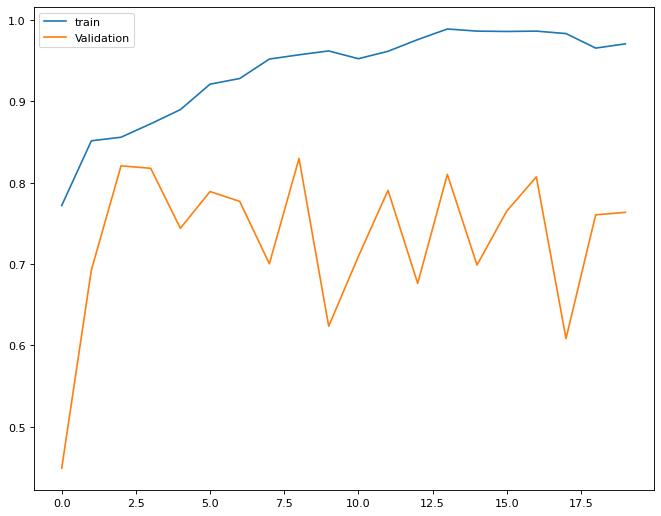

In [ ]:
# Plotting Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=80)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()

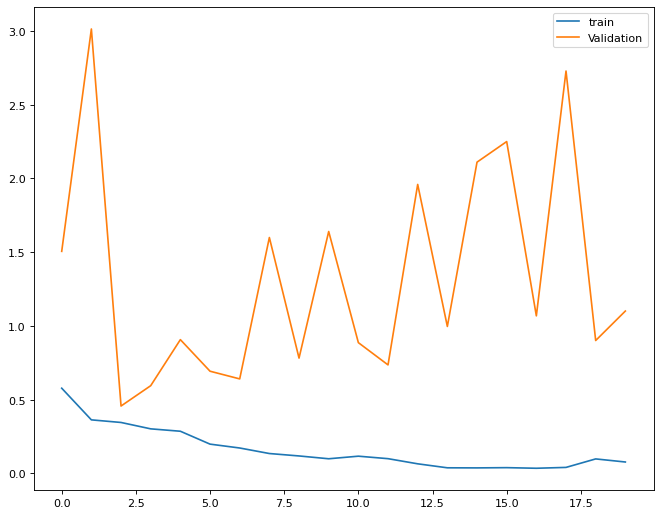

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="Validation")
plt.legend()
plt.show()